In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageOps

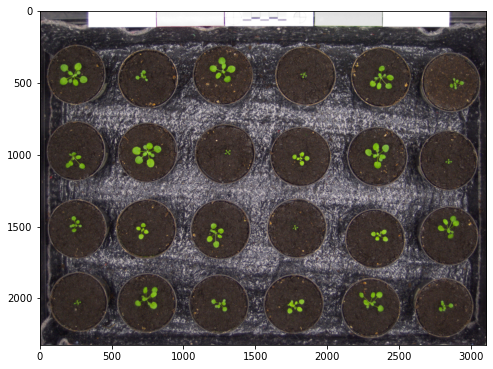

In [2]:
# Abrindo uma imagem

img = np.array(Image.open('images/exemplo1.png'))
_ = plt.figure(figsize=(8,8))
_ = plt.imshow(img)

In [3]:
# Detalhes da image

print(f"A imagem tem # dimensões: {img.ndim}")  # A imagem tem 3 dimensões pois é constituida de uma lista
                                                # de listas de listas. Isso pode ser compreendido da seguinte maneira:
                                                # Cada pixel é uma lista do tipo [R, G, B]. Cada linha é uma lista de pixels.
                                                # A imagem é uma lista das linhas.


print(f"A forma da imagem é: {img.shape}")
print(f"Dtype: {img.dtype}")
x = 10
y =10
print(f"Valor do pixel na posição ({x}, {y}): {img[x, x]}")                  # Valor na escala [R, G, B]
print(f"O Valor mínimo de Vermelho (R) na imagem é: {img[:, :, 0].min()}")   # Dessa forma, obtemos um array com 2 dimensões.
                                                                             # A lista [R, G, B] foi substituída pelos valores 
                                                                             # vermelho. Depois, extraímos o mínimo.
                                                                    

A imagem tem # dimensões: 3
A forma da imagem é: (2324, 3108, 3)
Dtype: uint8
Valor do pixel na posição (10, 10): [91 90 88]
O Valor mínimo de Vermelho (R) na imagem é: 0


In [4]:
# Testando numpy arrays...

matriz = []
cont = 1
for i in range(0, 10):
    linha = []
    for j in range(0, 10):
        linha.append(cont)
        cont += 1
    matriz.append(linha)

teste = np.array(matriz)
print(teste)
print(teste.ndim)

[[  1   2   3   4   5   6   7   8   9  10]
 [ 11  12  13  14  15  16  17  18  19  20]
 [ 21  22  23  24  25  26  27  28  29  30]
 [ 31  32  33  34  35  36  37  38  39  40]
 [ 41  42  43  44  45  46  47  48  49  50]
 [ 51  52  53  54  55  56  57  58  59  60]
 [ 61  62  63  64  65  66  67  68  69  70]
 [ 71  72  73  74  75  76  77  78  79  80]
 [ 81  82  83  84  85  86  87  88  89  90]
 [ 91  92  93  94  95  96  97  98  99 100]]
2


In [5]:
# Para salvar um ndarray como imagem:

caminho = "images/exemploSalvo.png"
pil_img = Image.fromarray(img)
pil_img.save(caminho)


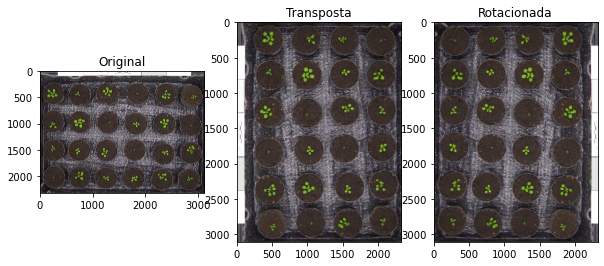

In [6]:
# Algoritmo para rotacionar uma imagem (matriz):

img = np.array(Image.open('images/exemplo1.png'))

degrees = 90

fig = plt.figure(figsize=(10, 10))
_ = fig.add_subplot(1, 3, 1)   # grid 1x3 1st subplot (image)
                           # Aqui, usaremos subplots de matplotlib para mostrar a imagem antes e depois de ter sido rotacionada

_ = plt.imshow(img)
_ = plt.title("Original")

img1 = img.copy()
_ = fig.add_subplot(1, 3, 2)
img1 = img1.transpose(1, 0, 2)
_ = plt.imshow(img1)
_ = plt.title("Transposta")

img0 = img.copy()

for i in range(degrees // 90):  # divisão inteira por 90. Aqui giraremos a figura somente em algum mútiplo de 90 graus.
    img0 = img0.transpose(1, 0, 2)
    for j in range(0, img0.shape[1] // 2):   #img0.shape retorna as dimensões do array (3108 linhas, 2324 colunas, 3 cores por pixel (RGB))
                                             #img0.shape[1] retorna a quantidade de colunas, então dividimos a quantidade de colunas por 2
        c = img0[:, j, :].copy()
        img0[:, j, :] = img0[:, img0.shape[1]-j-1, :]  # Estamos trocando as colunas da matriz transposta. 1 com última, 2 com penultima, ...
        img0[:, img0.shape[1]-j-1, :] = c

_ = fig.add_subplot(1, 3, 3)
_ = plt.imshow(img0)
_ = plt.title("Rotacionada")



In [7]:
teste = np.array([[[1, 2, 3], [4, 5, 6], [7, 8, 9]], 
                  [[10, 11, 12], [13, 14, 15], [16, 17, 18]],
                  [[19, 20, 21], [22, 23, 24], [25, 26, 27]]])
teste

array([[[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9]],

       [[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]],

       [[19, 20, 21],
        [22, 23, 24],
        [25, 26, 27]]])

In [8]:
teste.transpose(1, 0, 2)  # Indica a permutação dos eixos. (axes) Aqui linhas viram colunas
                          #  1-3    4-6    7-9
                          # 10-12  13-15  16-18
                          # 19-21  22-24  25-27


                          #  1-3    10-12   19-20
                          #  4-6    13-15   22-24
                          #  7-9    16-18   25-27

array([[[ 1,  2,  3],
        [10, 11, 12],
        [19, 20, 21]],

       [[ 4,  5,  6],
        [13, 14, 15],
        [22, 23, 24]],

       [[ 7,  8,  9],
        [16, 17, 18],
        [25, 26, 27]]])

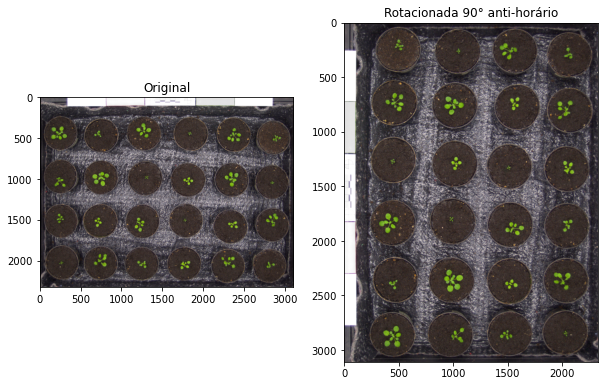

In [12]:
# Podemos usar funções prontas para rotacionar uma imagem.
# rotacionando uma imagem em 90 graus anti-horário.
fig = plt.figure(figsize=(10, 10))
_ = fig.add_subplot(1, 2, 1)
_ = plt.title("Original")
_ = plt.imshow(img)
_ = fig.add_subplot(1, 2, 2)
_ = plt.title("Rotacionada 90° anti-horário")
_ = plt.imshow(np.rot90(img))


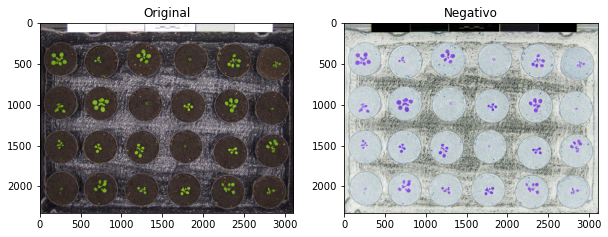

In [22]:
# Agora, vamos estudar como converter uma imagem colorida
# Para seu negativo

# Devemos tomar 3 passos para cada pixel da imagem

# Ou seja, calcular o novo RGB usando:
# R = 255 - R ; G = 255 - G; B = 255 - B

fig = plt.figure(figsize=(10, 10))
_ = fig.add_subplot(1, 2, 1)
_ = plt.title("Original")
_ = plt.imshow(img)
_ = fig.add_subplot(1, 2, 2)
_ = plt.title("Negativo")
imgN = 255 - img  # Assim, realizamos a subtração em cada pixel.
_ = plt.imshow(imgN)

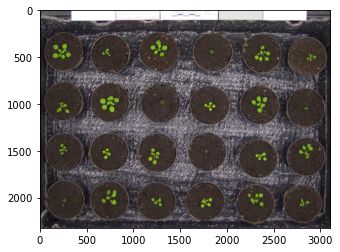

In [44]:
plt.imshow(img)

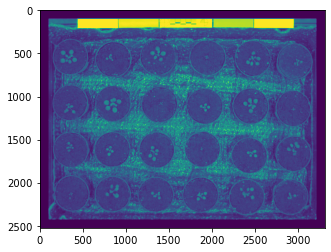

In [46]:
img_grey = np.mean(img, axis=2)  # Fazemos isso para deixar a imagem em 2 dimensões
# Obtendo a média dos canais R, G, B transformamos a imagem em escala de cinza.
# axis=2 pois é a dimensão do RGB.
img0 = img_grey.copy()
img0 = np.pad(img0, ((100,100),(100,100)), mode='constant')
_ = plt.imshow(img0)

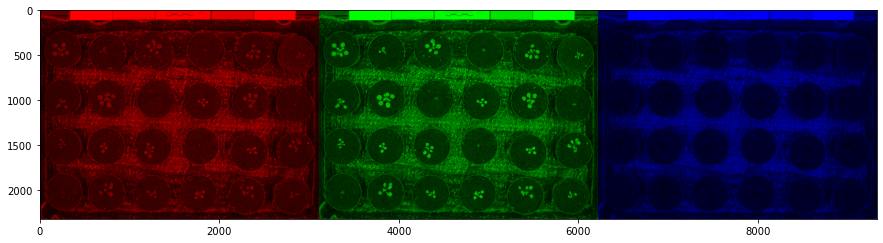

In [47]:
# Visualizando os canais RGB

img_R, img_G, img_B = img.copy(), img.copy(), img.copy()
img_R[:, :, (1, 2)] = 0  # Para cada pixel, zeramos os canais G e B
img_G[:, :, (0, 2)] = 0
img_B[:, :, (0, 1)] = 0

img_rgb = np.concatenate((img_R, img_G, img_B), axis=1) #Vamos concatenar na horizontal(linhas)
_ = plt.figure(figsize=(15,15))
_ = plt.imshow(img_rgb)


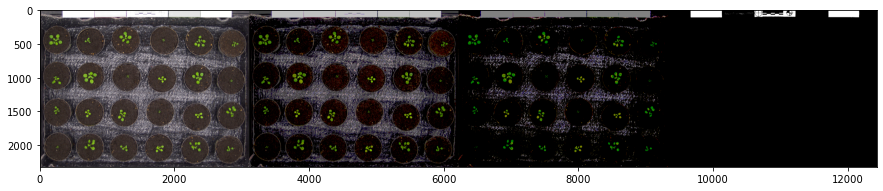

In [51]:
# Redução de cor
# Podemos realizar isso ao "aproximar a imagem do preto e branco."
# Utilizando divisão inteira para ir "arredondando" os valores dos pixels
img_0 = (img//64) * 64
img_1 = (img//128) * 128
img_2 = (img//255) * 255

img_all = np.concatenate((img, img_0, img_1, img_2), axis=1)
_ = plt.figure(figsize=(15,15))
_ = plt.imshow(img_all)

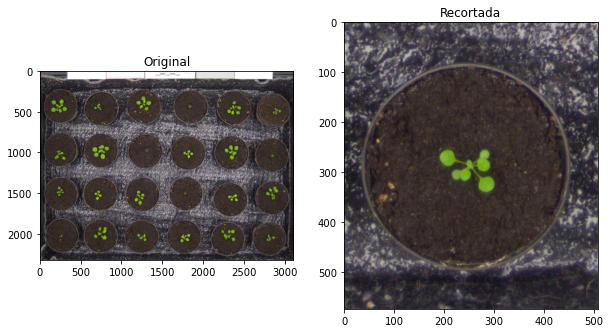

In [56]:
# Podemos recortar imagens usando slicing de arrays:

fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
_ = plt.imshow(img)
_ = plt.title("Original")
imgCortada = img[1750:, 1000: -1600, :]
fig.add_subplot(1, 2, 2)
_ = plt.imshow(imgCortada)
_ = plt.title("Recortada")


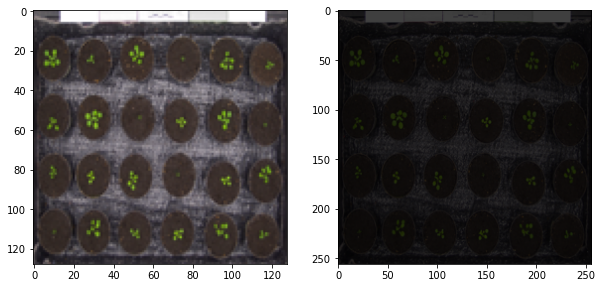

In [62]:
# Podemos colar uma imagem em outra.
# Vamos colar a imagem recortada na imagem original
inicial = np.array(Image.open('images/exemplo1.png').resize((128, 128))) # imagem pequena(128*128)
final = np.array(Image.open('images/exemplo1.png').resize((256, 256))) // 4 # imagem maior (256*256) o // 4 serve para escurecer a imagem.
fig = plt.figure(figsize=(10, 10))
_ = fig.add_subplot(1, 2, 1)
_ = plt.imshow(inicial)
_ = fig.add_subplot(1, 2, 2)
_ = plt.imshow(final)

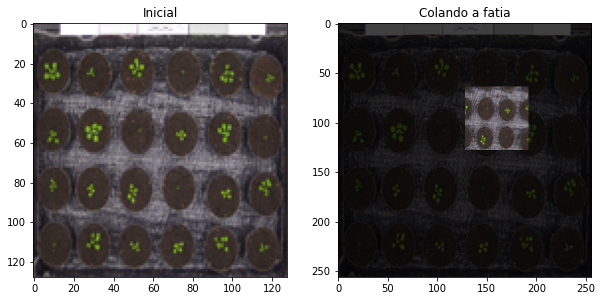

In [67]:
finalCopy = final.copy()
finalCopy[64:128, 128:192] = inicial[32:96, 32:96]
# note que 128 - 64 = 96 - 32 = 64. O quadrado colado será (64*64)
fig = plt.figure(figsize=(10, 10))
_ = fig.add_subplot(1, 2, 1)
_ = plt.imshow(inicial)
_ = plt.title("Inicial")
_ = fig.add_subplot(1, 2, 2)
_ = plt.imshow(finalCopy)
_ = plt.title("Colando a fatia")